### **Setup Interpreter**

Some test code that shows how to use **mllibs**

In [2]:
!ls

bf4.ipynb                 massive_annotator.ipynb   penguins.csv
gt_corpus.csv             mllibs_setup.ipynb        simple_NER.ipynb
local_classifier          ner_modelparams_annot.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mllibs.nlpm import nlpm
from mllibs.nlpi import nlpi
from mllibs.eda.meda_scplot import eda_scplot
from mllibs.eda.meda_pplot import eda_pplot
from mllibs.eda.meda_splot import eda_splot
from mllibs.nlp.mencoder import encoder
from mllibs.nlp.membedding import embedding
from mllibs.stats.mstats_tests import stats_tests
from mllibs.stats.mstats_plot import stats_plot
from mllibs.libop.mlibop import libop_general
from mllibs.pd.mpd_df import pd_df
from mllibs.pd.mpd_talktodata import pd_talktodata
from mllibs.signal.mfourier_all import fourier_all
# from mllibs.moutliers import data_outliers
# from mllibs.mdsplit import make_fold
# from mllibs.musldimred import make_dimred 

# nlpi.activate = False
# link all modules into one collection|
collection = nlpm()
collection.load([
                 eda_splot(),     # [eda] standard seaborn plots
                 eda_scplot(),    # [eda] seaborn column plots
                 encoder(),       # [nlp] standard encoding methods 
                 embedding(),     # [nlp] embedding methods
                 eda_pplot(),     # [eda] plotly express visualisations
                 stats_tests(),   # [stats] statistical tests for list data
                 stats_plot(),    # [stats] ploty and compare statistical distributions
                 libop_general(), # [library] mllibs related functionality
                 pd_df(),         # [eda] simple pandas operations
                 pd_talktodata(),  # [eda] pandas data exploration 
                 fourier_all()    # [signal] fast fourier transformation related
                ])

# collection.setup(type='load_bert')
collection.setup(type='mlloop')
interpreter = nlpi(collection)
interpreter.load_sample_data()
interpreter.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

# ldata = nlpi.data['iris']['data']
# train,test = train_test_split(ldata)
# interpreter.store_data({'train':train,'test':test})

# store data
# sample1 = list(np.random.normal(scale=1, size=1000))
# sample2 = list(np.random.normal(scale=1, size=1000))
# interpreter.store_data({'distribution_A':sample1,'distribution_B':sample2})

/Users/mac/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[note] initialising nlpm, please load modules using .load(list)
[note] loading modules ...
[note] making module summary labels...
[note] training  [gt] [RandomForestClassifier()] [accuracy,0.998]
[note] models trained!


In [4]:
# collection.ner_identifier['tfidf'].vocabulary_

In [4]:
# import torch
# from sklearn import preprocessing

# model = collection.model['gtb']
# tokeniser = collection.tokeniser['gtb']
# le = preprocessing.LabelEncoder()
# df = collection.corpus_gt
# targets = le.fit_transform(df['task'])

# def inference(text,tokeniser,model):

#     # Tokenize the input text
#     inputs = tokeniser(input_text, 
#                        padding=True, 
#                        truncation=True, 
#                        return_tensors='pt')

#     # Perform inference using the model
#     with torch.no_grad():
#         outputs = model(**inputs)
#         logits = outputs.logits

#     # Get the predicted label
#     predicted_label = torch.argmax(logits, dim=1).item()

#     # Print the predicted label
#     print(f"The predicted label for the input text is: {le.classes_[predicted_label]}")
    
# # input_text = "I'd like you to create a seaborn scatterplot" # 61
# # input_text = "I want to plot a figure using the seaborn scatter plot" # 61
# input_text = "create a plotly scatter plot visualisation x: bill_depth_mm y: flipper_length_mm hue: sex col: sex using penguins"

# inference(input_text,tokeniser,model)

The predicted label for the input text is: plscatter


Dickey-Fuller criterion: p=0.991880243437641


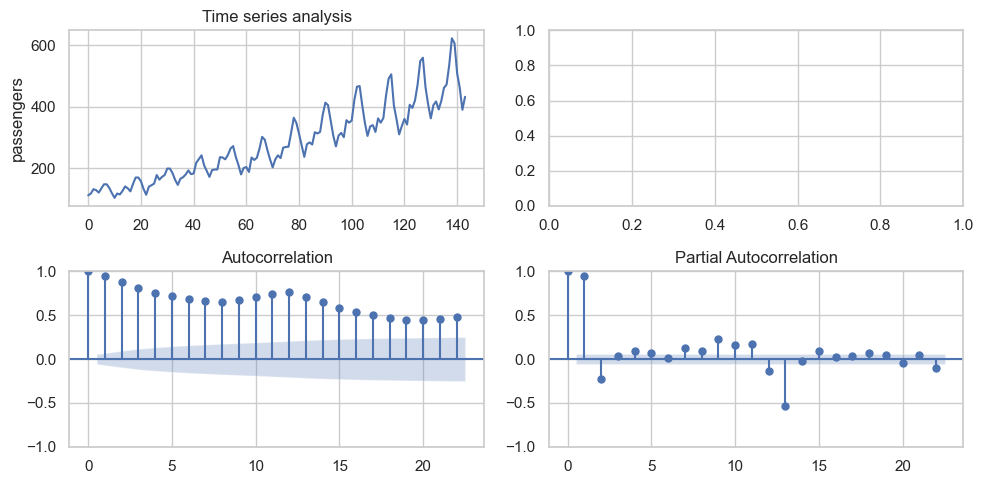

In [37]:
import statsmodels.api as sm
import plotly.graph_objects as go

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as smt
sns.set(style='whitegrid')

def tsplot(y, lags=None, figsize=(10, 5), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    ts_ax = axes[0, 0]
    acf_ax = axes[1, 0]
    pacf_ax = axes[1, 1]

    sns.lineplot(data=y, ax=ts_ax)
    ts_ax.set_title('Time series analysis')
    smt.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    smt.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

    pval = sm.tsa.stattools.adfuller(y)[1]
    print(f"Dickey-Fuller criterion: p={pval}")
    if p_value <= 0.05:
        print("Reject the null hypothesis")
        print("""
              The time series data is likely to be non-stationary and may require
              further processing or differencing to make it suitable for time series analysis.
               """)
    else:
            print("Fail to reject the null hypothesis")
    plt.tight_layout()
    plt.show()

tsplot(df['passengers'])

In [5]:
interpreter['show the dataframe information for stocks']

[note] found relevant global task [show_info] w/ [0.44] certainty!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    105 non-null    object 
 1   GOOG    105 non-null    float64
 2   AAPL    105 non-null    float64
 3   AMZN    105 non-null    float64
 4   FB      105 non-null    float64
 5   NFLX    105 non-null    float64
 6   MSFT    105 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.9+ KB
None


In [7]:
# interpreter['generate one hot encoding of column sex island using penguins']

# store column names for a particular dataset
# interpreter.store_ac('penguins','ohe_columns',['sex','island'])

# interpreter['generate one hot encoding of column {ohe_columns} using penguins']
# interpreter['please generate one hot encoding of columns A, B in data X']
# interpreter['please generate the fft for column passengers in flights']
interpreter['please generate the fft for columns GOOG in stocks']

[note] found relevant global task [sig_fourierplot] w/ [0.46] certainty!
[note] column not present in dataframe


In [4]:
# interpreter.module_args['columns']
interpreter.token_info
# collection.ner_identifier['y_pred']

,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab
0,please,0,uni,O,NaN,NaN,NaN,str,please,False,0,True
1,generate,1,uni,O,NaN,NaN,NaN,str,generate,False,0,True
2,the,2,uni,O,NaN,NaN,NaN,str,the,False,0,True
3,fft,3,uni,O,NaN,NaN,NaN,str,fft,False,0,True
4,for,4,uni,B-PARAM,NaN,NaN,NaN,str,for,False,0,True
5,columns,5,uni,I-PARAM,NaN,NaN,NaN,str,columns,True,0,True
6,GOOG,6,uni,O,NaN,NaN,stocks,str,GOOG,False,True,False
7,APPLE,7,uni,O,NaN,NaN,NaN,str,APPLE,False,0,False
8,in,8,uni,B-SOURCE,NaN,NaN,NaN,str,in,False,0,True
9,stocks,9,uni,O,0.0,pd.DataFrame,NaN,str,stocks,False,0,False


In [6]:
def check_list_in_col(df:pd.DataFrame,lst:list):

    # Get the column names of the DataFrame
    df_column_names = df.columns.tolist()
    
    # Check if all items in column_names_list are present in df_column_names
    if all(column in df_column_names for column in lst):
        return True
    else:
        return False

df = interpreter.data['flights']['data']
cols = ['passengers']
check_list_in_col(df,cols)

True

In [2]:
'''

mllibs related queries

'''

# interpreter['which data is available to me']
interpreter['show the dataframe information for data flights']

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


The predicted label for the input text is: show_info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None


In [70]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq
import plotly.express as px
import seaborn as sns

df = sns.load_dataset('flights')
series = df['passengers']

# Assuming 'series' is your pandas Series
# Convert the pandas Series to a numpy array

def get_fft(data:pd.Series):

    # numpy
    data = data.values
    
    # Calculate the FFT using scipy
    fft_result = fft(data)
    
    # Calculate the frequency values corresponding to the FFT coefficients in Hz
    n = len(data)  # Length of the input data
    timestep = 1  # Assume a unit timestep for simplicity
    freq = fftfreq(n, d=timestep)
    freq_in_hz = np.fft.fftshift(freq) * n  # Convert normalized frequency to Hz
    
    # Calculate the magnitude of the FFT coefficients
    magnitude = np.abs(fft_result)
    
    df = pd.DataFrame({'freq':freq_in_hz,'magnitude':magnitude})
    df = df[df['freq'] > 0]
    return df


# # Create a Plotly figure to visualize the FFT result with a logarithmic x-axis
# fig = px.line(df,x='freq', y='magnitude',template='plotly_white',width=700)
# fig.update_layout(
#     title='FFT Result',
#     xaxis_title='Frequency (Hz)',
#     yaxis_title='Magnitude',
#     xaxis_type='log',  # Set x-axis to be logarithmic
#     yaxis_type='log'  # Set x-axis to be logarithmic
# )
# fig.show()



# Calculate the difference in counts for each column
# disbalance = value_counts.apply(lambda x: x.max() - x.min())
# disbalance

# # Find the column with the largest difference in count disbalance
# max_disbalance_column = disbalance.idxmax()

# print("Column with the biggest difference in count disbalance:", max_disbalance_column)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


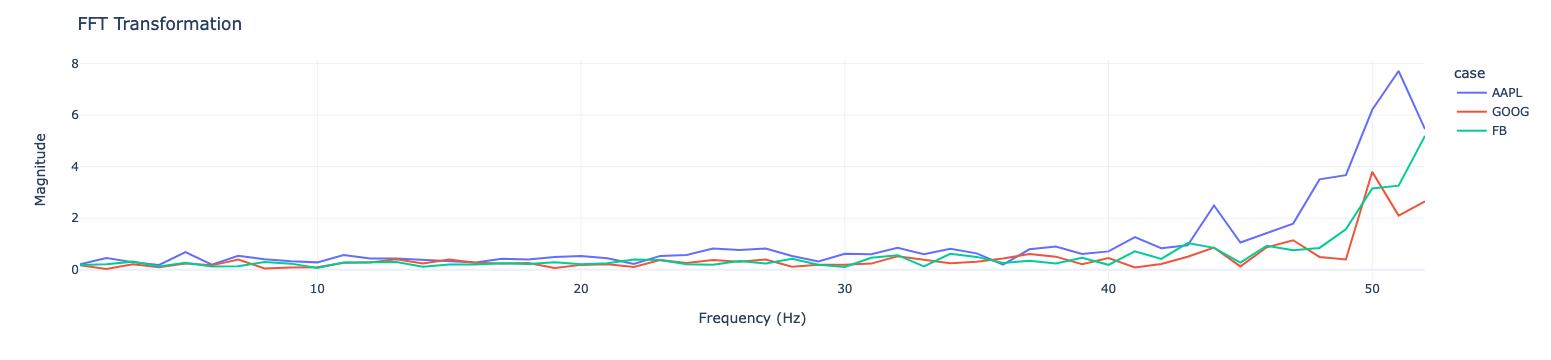

In [90]:
import plotly.express as px

df = px.data.stocks()
display(df.head())

df = px.data.stocks()

'''

Check if dataframe contains the list of column names provided

'''

def check_list_in_col(df:pd.DataFrame,lst:list):

    # Get the column names of the DataFrame
    df_column_names = df.columns.tolist()
    
    # Check if all items in column_names_list are present in df_column_names
    if all(column in df_column_names for column in lst):
        return True
    else:
        return False


def plot_cols(df:pd.DataFrame,cols:list):

    col_check = check_list_in_col(df,cols)

    if(col_check):
        
        lst_df = []
        for col in cols:
            df_fft = get_fft(df[col])
            df_fft['case'] = df[col].name
            lst_df.append(df_fft)
    
        if(len(lst_df) > 1):
            merged_df = pd.concat(lst_df, ignore_index=True)
            color = 'case'
        else:
            merged_df = lst_df[0]
            color = None
    
        # Create a Plotly figure to visualize the FFT result with a logarithmic x-axis
        
        fig = px.line(merged_df,x='freq', y='magnitude',color=color,template='plotly_white',width=700)
        fig.update_layout(
            title='FFT Transformation',
            xaxis_title='Frequency (Hz)',
            yaxis_title='Magnitude',
            # xaxis_type='log',  # Set x-axis to be logarithmic
            # yaxis_type='log'  # Set x-axis to be logarithmic
        )
        fig.show()

    else:
        print('[note] column not present in dataframe')

plot_cols(df,['AAPL','GOOG','FB'])

In [115]:
# funds = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/funds_data.csv',delimiter=';')
# funds.head()
# interpreter.store_data({'funds':train})

import pandas as pd

'''

Convert list to:

        - list 
        - dataframe
        - dictionary

'''

def convert_list(data:list,output_type:str,name:str=None):
    
    if output_type == 'series':
        if(name == None):
            return pd.Series(data,name='list')
        else:
            return pd.Series(data,name=f'{list}')
    elif output_type == 'dataframe':
        if(name == None):
            return pd.DataFrame(data,columns=[f'{name}'])
        else:
            return pd.DataFrame(data,columns=['list'])
    elif output_type == 'dict':
        if(name == None):
            return {'list':data}
        else:
            return {f'{name}':data}
    else:
        return "Invalid output type"


def convert_series(data:pd.Series,output_type:str,name:str=None):

    # list
    if(output_type == 'list_data'):
        return data.tolist()
    elif(output_type == 'list_index'):
        return list(data.index)

    # dataframe
    elif(output_type == 'dataframe'):
        if(name == None):
            return data.to_frame()
        else:
            ldf = data.to_frame()
            ldf.columns = [f'{name}']
            return ldf
            
    # dictionary
    elif(output_type == 'dict_index'):
        return data.to_dict()
    elif(output_type == 'dict_rindex'):
        return {v: k for k, v in data.to_dict().items()}
    elif(output_type == 'dict_name'):
        if(name == None):
            return {data.name:list(data.values)}
        else:
            return {f'{name}':list(data.values)}


# Example usage
input_series = pd.Series([1, 2, 3, 4, 5],name='column',index=['a','b','c','d','e'])
# convert_list(input_list, 'series')
# convert_list(input_list, 'dataframe')
# convert_list(input_list, 'dictionary','data')


convert_series(input_series,'dict_name')

{'column': [1, 2, 3, 4, 5]}

In [4]:
'''

pd_df library tests

'''

interpreter['concatenate two dataframes train test axis: 0 join: inner']

The predicted label for the input text is: dfconcat


In [3]:
# '''

# mstats_tests library tests

# '''

# import numpy as np

# nlpi.activate = True
# nlpi.silent = True

# # store data
# sample1 = list(np.random.normal(loc=1,scale=1, size=1000))
# sample2 = list(np.random.normal(loc=1,scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# # req = "two sample ttest using: distribution_B distribution_A"
# # req = "comapare histograms of samples distribution_B distribution_A"
# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "compare kde plot of two samples distribution_B distribution_A"

# # interpreter[req]

# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "create bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]


# # req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]

# sample1 = list(np.random.exponential(scale=1, size=1000))
# sample2 = list(np.random.exponential(scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# interpreter[req]


In [2]:
# interpreter.token_info
# interpreter.module_args

In [21]:
'''

mpd_talktodata examples

'''

nlpi.silent = True

interpreter['show the distribution of column island in penguins'] # ok
# interpreter['show the all the missing data in penguins'] # ok
# interpreter['show missing data in column sex in data penguins'] # ok
# interpreter['show missing data all columns in penguins']
# interpreter['show the dataframe size of penguins']
interpreter['show the unique values in column island in data penguins']

The predicted label for the input text is: dfcolumn_distr


island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

The predicted label for the input text is: dfcolumn_unique
['Torgersen' 'Biscoe' 'Dream']


In [4]:
# from itertools import groupby

# ls = interpreter.token_info.copy()
# my_list = list(ls['vocab'])
# print(my_list)
  
# # group together values      
# result = [list(group) for key, group in groupby(my_list)]
# print(result)

# # group together indicies of values
# result = [[i for i, _ in group] for key, group in groupby(enumerate(my_list), key=lambda x: x[1]) if key is True]
# print(result)

# longest_subset = max(result,key=len)
# longest_subset = set(longest_subset)
# print(longest_subset)

# # ner tags which are not O (eg. PARAM/SOURCE)
# notO = [ i for i,j in enumerate(list(ls['ner_tags'])) if j != 'O' ]
# notO_set = set(notO)

# # find overlap
# overlap_idx = longest_subset & notO_set

# ls['keep_token'] = False
# ls.loc[list(overlap_idx),'keep_token'] = True
# ls

[note] storing [y] in module_args
[note] found relevant global task [plscatter] w/ [0.77] certainty!
subset None


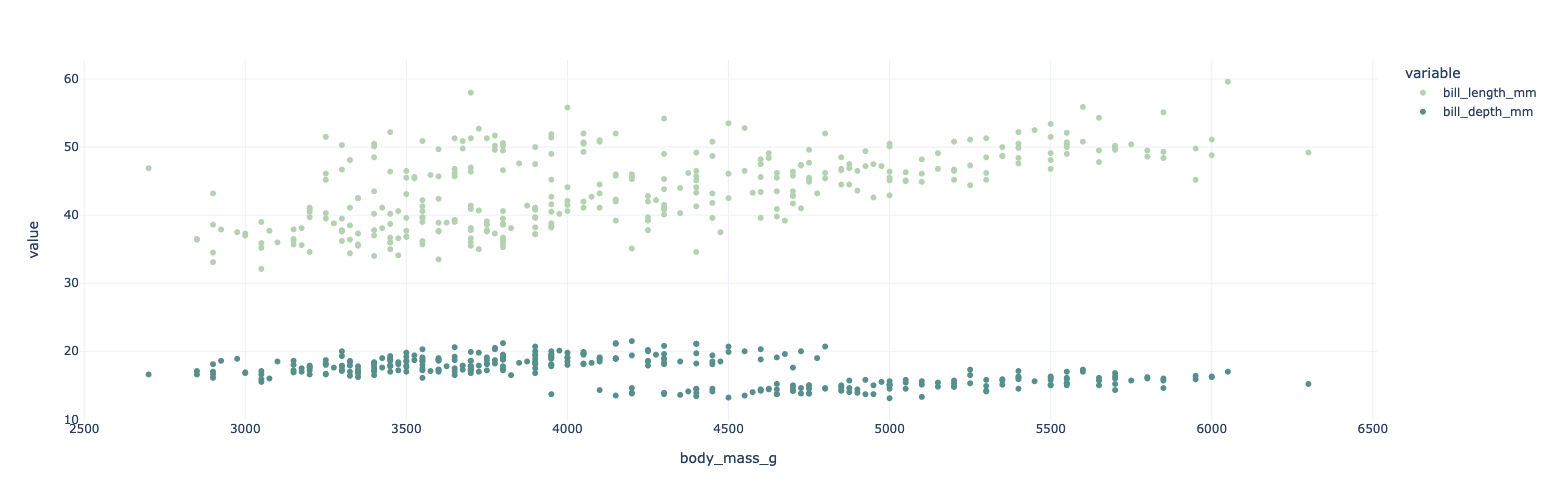

[note] storing [y] in module_args
[note] found relevant global task [plscatter] w/ [0.77] certainty!
subset None


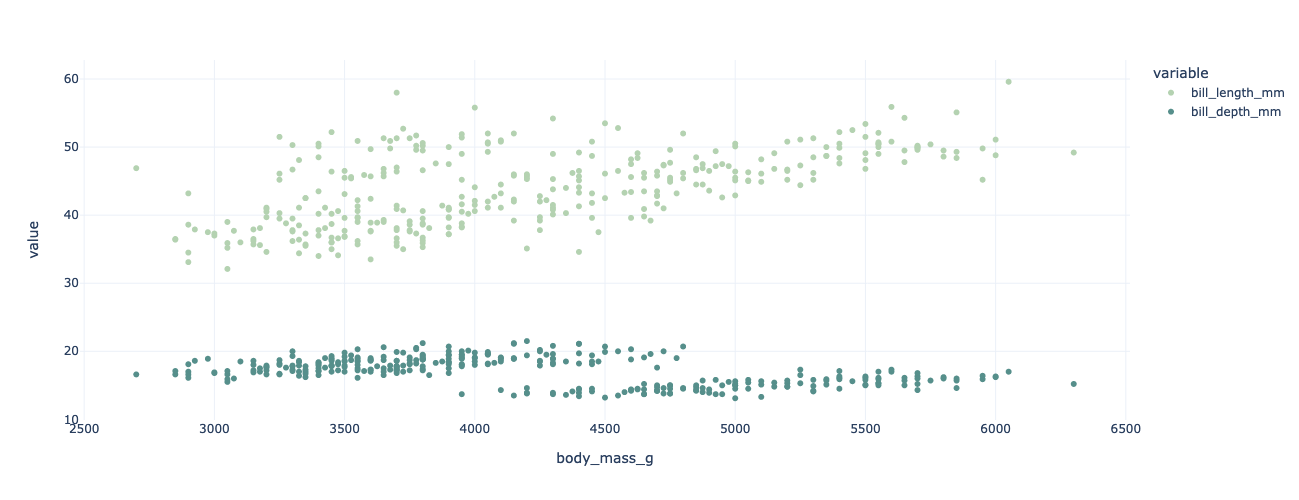

In [10]:
interpreter.setpp({'figsize':[700,500],'template':'plotly_white','title':None})

# [0] using active columns

req = '''
create plotly scatter plot
x: body_mass_g y: {selected_columns}
using penguins
'''

interpreter[req]

# simple request one PARAM per column 
# req = '''
# create plotly scatterplot
# x: bill_depth_mm y: flipper_length_mm hue: island
# using penguins
# '''

# interpreter[req]

# [1] regular notation (multiple y) 

# req = '''
# mew: 1.5
# create plotly scatterplot
# x: body_mass_g y: bill_length_mm bill_depth_mm
# using penguins
# '''

# interpreter[req]

# [1] regular notation (single y) 

# req = '''
# mew: 1
# create plotly scatterplot
# x: body_mass_g y: bill_depth_mm
# using penguins
# '''

# req = '''
# create plotly scatterplot
# x: body_mass_g y: bill_depth_mm hue: island col sex
# mew: 1.5, mec: black s: 7
# marginal_x box marginal_y box
# using penguins
# '''

# req = '''
# create plotly boxplot
# x: island y: bill_depth_mm hue sex
# using penguins
# '''

# [2] simple request one PARAM per column

# req = '''
# create plotly count heatmap
# x: bill_depth_mm y: flipper_length_mm hue: sex col: sex
# using penguins
# '''

interpreter[req]

In [4]:
# nlpi.silent = False
# interpreter['seaborn scatterplot using penguins x bill_length_mm y bill_depth_mm hue: island']

interpreter.token_info
# interpreter.module_args['mew']

,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab
0,create,0,uni,O,NaN,NaN,NaN,str,create,False,0,True
1,plotly,1,uni,O,NaN,NaN,NaN,str,plotly,False,0,True
2,scatterplot,2,uni,O,NaN,NaN,NaN,str,scatterplot,False,0,True
3,x,3,uni,B-PARAM,NaN,NaN,NaN,str,x,True,0,False
4,body_mass_g,4,uni,O,NaN,NaN,penguins,str,body_mass_g,False,True,False
5,y,5,uni,B-PARAM,NaN,NaN,NaN,str,y,True,0,False
6,bill_depth_mm,6,uni,O,NaN,NaN,penguins,str,bill_depth_mm,False,True,False
7,hue,7,uni,B-PARAM,NaN,NaN,NaN,str,hue,True,0,False
8,island,8,uni,O,NaN,NaN,penguins,str,island,False,True,False
9,mew,9,uni,B-PARAM,NaN,NaN,NaN,str,mew,True,0,False


In [134]:
# # '''

# # Column Plots

# # '''

# interpreter.setpp
# ({'alpha':1.0,'fill':True,'mec':'k','mew':1.5,'stheme':'viridis','s':35})
# interpreter['visualise column scatterplot for penguins x bill_length_mm hue sex']

In [15]:
# from sklearn.ensemble import RandomForestClassifier
# from seaborn import load_dataset

# data = load_dataset('iris')
# X = data.iloc[:,:-1]
# y = data['species']

# model = RandomForestClassifier()
# model.fit(X,y)

# X_test = [4.9,3.0,1.4,0.2] # setosa
# model.predict_proba([X_test])

array([[1., 0., 0.]])

In [86]:
# interpreter['pca dimensionality reduction using data housing']
# interpreter.glr()['data']
# interpreter.store_data(interpreter.glr()['data'],'pca')

In [135]:
# # plot first two dimensions
# interpreter.setpp({'alpha':1.0,'fill':False,'mec':'k','mew':1,'s':25})
# interpreter['create seaborn scatter plot using data pca x:dim_0 y:dim_1']

In [87]:
# # interpreter.fl('usldimred')
# interpreter.fl()

### Debugging

In [185]:
# collection.test('gt','create a boxplot')
# collection.predict_gtask('gt','create a column boxplot')

# eval("['A','B','C']")
# exec("x=['A','B','C']")

In [136]:
# '''

# Do some testing to make sure the corpus works well 

# '''

# # collection.dtest('eda_plot','create seaborn scatter plot')
# collection.dtest('gt','compare histograms of samples')

In [ ]:
# collection.test('gt','create a boxplot')
# collection.predict_gtask('gt','create a column boxplot')

In [137]:
# '''

# Seaborn Plots

# '''

# req = '''
# create seaborn relplot
# x: bill_length_mm 
# y: bill_depth_mm 
# hue: island
# kind: scatter
# using penguins
# '''

# interpreter.setpp({'fill':True,'alpha':1,'mew':1})
# interpreter[req]

# # interpreter['create seaborn boxplot using housing y AGE x RAD']
# # interpreter['create seaborn relplot x: bill_length_mm y: bill_depth_mm hue island col=island alpha=1.0 s:50 mew: 1 using penguins']
# # interpreter['create seaborn relplot x: bill_length_mm y: bill_depth_mm hue island using penguins']

In [140]:
# lst = [1,2,3,4,5,6]
# for i,j in zip(lst,lst[1:]):
#     print(i*j)

# eval("['A','B','C']")
# exec("x=['A','B','C']")

In [141]:
# # self.task_name
# 'plotly' in interpreter.task_info.loc['plscatter','description']

In [6]:
from catboost import CatBoostClassifier

# Create and train the initial model
model = CatBoostClassifier(iterations=50, learning_rate=0.1)
train_data = [[1, 2, 3], [4, 5, 6]]
train_labels = [1, 0]
model.fit(train_data, train_labels)

# Continue training the model with new data
new_data = [[7, 8, 9], [10, 11, 12]]
new_labels = [1, 0]
model.fit(new_data, new_labels, init_model=model)

0:	learn: 0.6854827	total: 1.67ms	remaining: 81.9ms
1:	learn: 0.6779328	total: 1.84ms	remaining: 44.1ms
2:	learn: 0.6705009	total: 1.93ms	remaining: 30.2ms
3:	learn: 0.6631782	total: 3.35ms	remaining: 38.6ms
4:	learn: 0.6559709	total: 3.72ms	remaining: 33.5ms
5:	learn: 0.6488702	total: 3.85ms	remaining: 28.2ms
6:	learn: 0.6418773	total: 3.93ms	remaining: 24.2ms
7:	learn: 0.6349906	total: 4.02ms	remaining: 21.1ms
8:	learn: 0.6282111	total: 4.12ms	remaining: 18.8ms
9:	learn: 0.6215321	total: 4.21ms	remaining: 16.8ms
10:	learn: 0.6149541	total: 4.29ms	remaining: 15.2ms
11:	learn: 0.6084809	total: 4.38ms	remaining: 13.9ms
12:	learn: 0.6020998	total: 4.47ms	remaining: 12.7ms
13:	learn: 0.5958196	total: 4.56ms	remaining: 11.7ms
14:	learn: 0.5896326	total: 4.64ms	remaining: 10.8ms
15:	learn: 0.5835398	total: 4.73ms	remaining: 10ms
16:	learn: 0.5775391	total: 4.87ms	remaining: 9.46ms
17:	learn: 0.5716280	total: 4.93ms	remaining: 8.76ms
18:	learn: 0.5658067	total: 4.98ms	remaining: 8.12ms
19:	l